In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('drug200.csv')

In [4]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [5]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
#Checking for Null Values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
len(df)

200

In [9]:
#Check for Duplicate rows
df.duplicated().sum()

0

### Column descriptions

* 1.Age->Age of patient
* 2.Sex->Gender of Patient
* 3.BP->Blood Pressure
* 4.Cholesterol
* 5.Na_to_K->Sodium to Potassium ratio
* 6.Drug->Drug type(Target Variable)

In [10]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

So, Here Dataset contains only male and female data

In [11]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [12]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [13]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

## BASIC EDA

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("AGE DISTRIBUTION")
df['Age'].plot(kind='kde')

In [15]:
print("Mean Patient Age is: "+str(df['Age'].mean()))

Mean Patient Age is: 44.315


c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


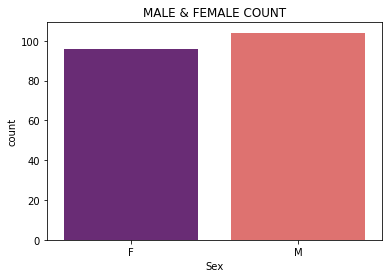

In [16]:
plt.title("MALE & FEMALE COUNT")
sns.countplot((df['Sex']),palette='magma')

In [17]:
print("% of male & female")
(df.Sex.value_counts()/200)*100

% of male & female


M    52.0
F    48.0
Name: Sex, dtype: float64

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


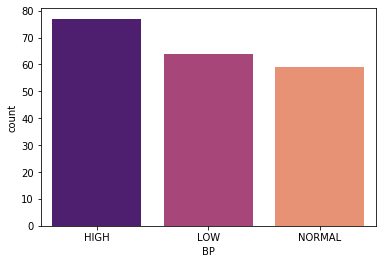

In [18]:
sns.countplot(df['BP'],palette='magma')

In [19]:
(df['BP'].value_counts())*100/200

HIGH      38.5
LOW       32.0
NORMAL    29.5
Name: BP, dtype: float64

* Only about 30 percent of the patients have normal BP

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


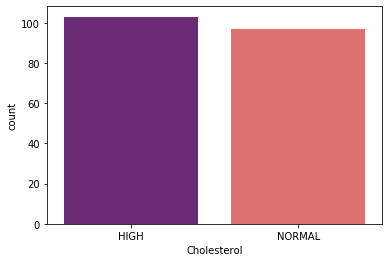

In [20]:
sns.countplot(df['Cholesterol'], palette='magma')

In [21]:
(df['Cholesterol'].value_counts())*100/200

HIGH      51.5
NORMAL    48.5
Name: Cholesterol, dtype: float64

* Almost half of the patients have high cholestrol

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


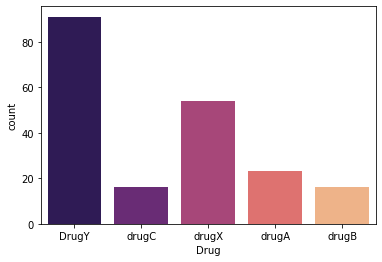

In [22]:
sns.countplot(df['Drug'],palette='magma')

* Here, Drug Y is the most frequently used among patient
* Drug used is unbalanced


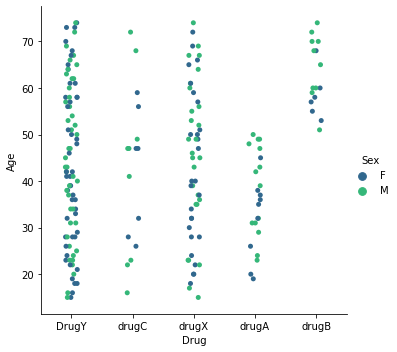

In [23]:
sns.catplot(x="Drug", y="Age",hue="Sex",data=df,palette='viridis')

* 1.Drug B is only used by patients of Age > 50
* 2.Drug A is only used by patients of Age < 50

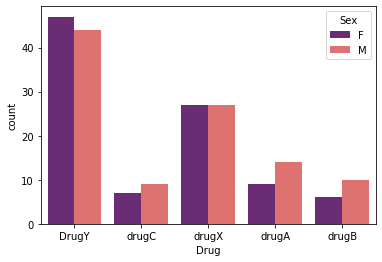

In [24]:
sns.countplot(data=df,x='Drug',hue='Sex',palette='magma')

Drug Y is used more by Females while some others are used more by males

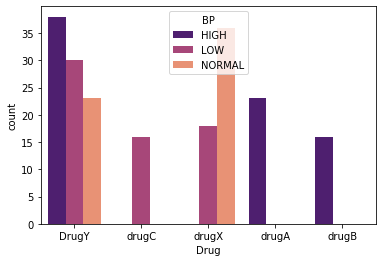

In [25]:
sns.countplot(data=df,x='Drug',hue='BP',palette='magma')

* Drug Y are mostly used by people with HIGH bp
* Drug C is only used by people with LOW bp
* Drug X is not used by people with HIGH bp
* Drug A & B is only used by people with HIGH bp

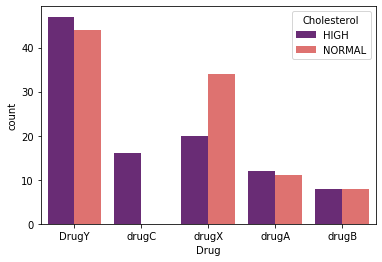

In [26]:
sns.countplot(data=df,x='Drug',hue='Cholesterol',palette='magma')

 * Drug C is only taken by people with HIGH cholestrol

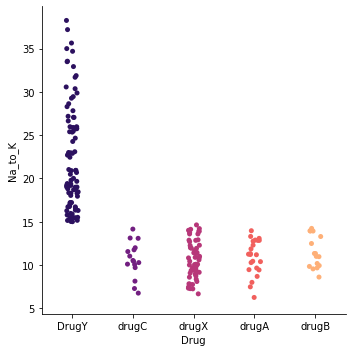

In [27]:
sns.catplot(x="Drug", y="Na_to_K",data=df,palette='magma')

* Drug Y is only used by patients with Na to k ratio > 15

# Feature Engineering
* Na to K can be used to create a new feature
* Use Na to K >= 15 to create new feature

In [28]:
df['NAK'] = df['Na_to_K'].apply(lambda x: 1 if x >= 15 else 0)

# Preparing data for modelling

In [29]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'NAK'], dtype='object')

In [30]:
###Categorical Variables
cols = ['Sex','BP','Cholesterol','Drug','NAK']

In [31]:
###label encoding
from sklearn.preprocessing import LabelEncoder
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [32]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,NAK
0,23,0,0,0,25.355,0,1
1,47,1,1,0,13.093,3,0
2,47,1,1,0,10.114,3,0
3,28,0,2,0,7.798,4,0
4,61,0,1,0,18.043,0,1


In [33]:
###scaling
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ncols = ['Age','Na_to_K']
df[ncols] = ms.fit_transform(df[ncols])

In [34]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,NAK
0,0.135593,0,0,0,0.596848,0,1
1,0.542373,1,1,0,0.213397,3,0
2,0.542373,1,1,0,0.120239,3,0
3,0.220339,0,2,0,0.047814,4,0
4,0.779661,0,1,0,0.368191,0,1


In [35]:
X = df.drop('Drug',axis=1)
y = df['Drug']

# MODELLING

* 1.KNN using kfold cross validation

In [36]:
scores = {}

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
scores['Knn'] = np.mean(cv_scores)
print(f"KNN SCORE : {np.mean(cv_scores)}")

KNN SCORE : 0.9847435897435897


## 2.Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)
cv_scores = cross_val_score(rfc, X, y, cv=5)
scores['RandomForest'] = np.mean(cv_scores)
print(f"Random Forest Score : {np.mean(cv_scores)}")

Random Forest Score : 0.9794804318488529


c:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 

In [39]:
scores

{'Knn': 0.9847435897435897, 'RandomForest': 0.9794804318488529}

* So,here Both model work best for this dataset but still here randomforest get good score as compare to KNN.